# Convolutional Layer
---
In this notebook, we visualize four filtered outputs (a.k.a. feature maps) of a convolutional layer.

### Install OpenCV

In [ ]:
!pip install opencv-python

### Import the image

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = 'images/son_heung_min.jpg'

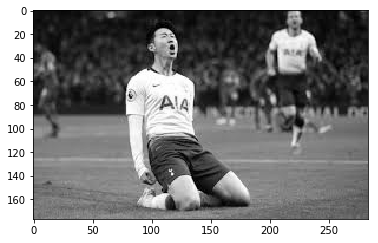

In [2]:
bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

gray_img = gray_img.astype("float32")/255

plt.imshow(gray_img, cmap='gray')
plt.show()

In [3]:
gray_img

array([[0.07450981, 0.07058824, 0.07058824, ..., 0.43529412, 0.3372549 ,
        0.23921569],
       [0.07450981, 0.07058824, 0.07058824, ..., 0.29411766, 0.22352941,
        0.16078432],
       [0.07450981, 0.07058824, 0.07058824, ..., 0.19215687, 0.14901961,
        0.11372549],
       ...,
       [0.40784314, 0.46666667, 0.49411765, ..., 0.41960785, 0.4       ,
        0.38039216],
       [0.42745098, 0.4392157 , 0.47058824, ..., 0.3882353 , 0.3764706 ,
        0.36862746],
       [0.5137255 , 0.47843137, 0.5058824 , ..., 0.39607844, 0.38431373,
        0.36862746]], dtype=float32)

In [4]:
type(gray_img)

numpy.ndarray

In [5]:
gray_img.shape

(177, 284)

In [6]:
bgr_img.shape

(177, 284, 3)

### Define and visualize the filters

In [7]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!

In [8]:
filter_vals = np.array([[-1, -1, 1, 1],[-1, -1, 1, 1],[-1, -1, 1, 1],[-1, -1, 1, 1]])

print("Filter shape : ", filter_vals.shape)

Filter shape :  (4, 4)


In [9]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -1*filter_1
filter_3 = filter_1.T
filter_4 = -1*filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print("Filter 1 : \n", filter_1)


Filter 1 : 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


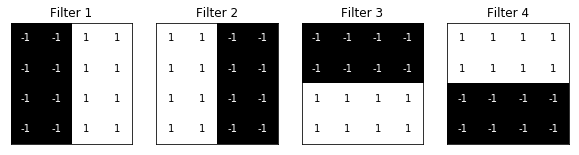

In [10]:
### do not modify the code below this line ###

# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')



### Define a convolutional layer 

Initialize a single convolutional layer so that it contains all your created filters. Note that you are not training this network; you are initializing the weights in a convolutional layer so that you can visualize what happens after a forward pass through this network!
 
- [Reference to Convolution Animation](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md#transposed-convolution-animations)
- [Reference to the various Convolution type](https://zzsza.github.io/data/2018/02/23/introduction-convolution/)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [12]:
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x

In [13]:
test_weight = torch.from_numpy(filters).unsqueeze(1)
test_weight

tensor([[[[-1, -1,  1,  1],
          [-1, -1,  1,  1],
          [-1, -1,  1,  1],
          [-1, -1,  1,  1]]],


        [[[ 1,  1, -1, -1],
          [ 1,  1, -1, -1],
          [ 1,  1, -1, -1],
          [ 1,  1, -1, -1]]],


        [[[-1, -1, -1, -1],
          [-1, -1, -1, -1],
          [ 1,  1,  1,  1],
          [ 1,  1,  1,  1]]],


        [[[ 1,  1,  1,  1],
          [ 1,  1,  1,  1],
          [-1, -1, -1, -1],
          [-1, -1, -1, -1]]]])

In [14]:
test_weight.shape

torch.Size([4, 1, 4, 4])

In [15]:
test_weight.shape[2:]

torch.Size([4, 4])

In [16]:
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


### Visualize the output of each filter

First, we'll define a helper function, `viz_layer` that takes in a specific layer and number of filters (optional argument), and displays the output of that layer once an image has been passed through.

In [17]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

Let's look at the output of a convolutional layer, before and after a ReLu activation function is applied.

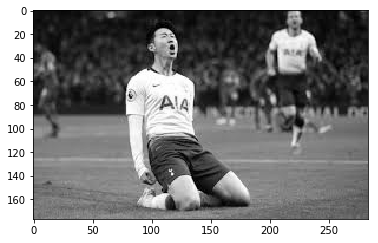

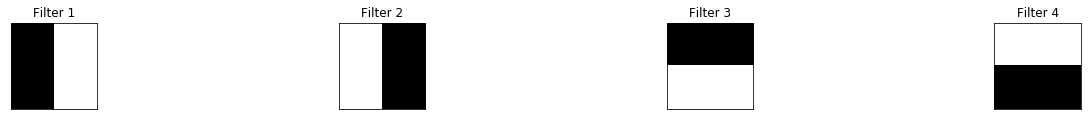

In [18]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))


In [19]:
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
gray_img_tensor

tensor([[[[ 0.0745,  0.0706,  0.0706,  ...,  0.4353,  0.3373,  0.2392],
          [ 0.0745,  0.0706,  0.0706,  ...,  0.2941,  0.2235,  0.1608],
          [ 0.0745,  0.0706,  0.0706,  ...,  0.1922,  0.1490,  0.1137],
          ...,
          [ 0.4078,  0.4667,  0.4941,  ...,  0.4196,  0.4000,  0.3804],
          [ 0.4275,  0.4392,  0.4706,  ...,  0.3882,  0.3765,  0.3686],
          [ 0.5137,  0.4784,  0.5059,  ...,  0.3961,  0.3843,  0.3686]]]])

In [20]:
gray_img_tensor.shape

torch.Size([1, 1, 177, 284])

In [21]:
# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)
conv_layer

tensor([[[[-0.0314, -0.0471, -0.0627,  ...,  0.0863, -0.5529, -0.8784],
          [-0.0314, -0.0471, -0.0627,  ...,  0.2588, -0.3020, -0.6353],
          [-0.0314, -0.0471, -0.0627,  ...,  0.3451, -0.1608, -0.4824],
          ...,
          [ 0.1412, -0.1725, -0.3451,  ...,  0.2235,  0.0863, -0.0706],
          [ 0.2314, -0.1529, -0.3686,  ...,  0.2784,  0.0431, -0.1451],
          [ 0.2196, -0.1686, -0.3373,  ...,  0.2235, -0.0275, -0.2078]],

         [[ 0.0314,  0.0471,  0.0627,  ..., -0.0863,  0.5529,  0.8784],
          [ 0.0314,  0.0471,  0.0627,  ..., -0.2588,  0.3020,  0.6353],
          [ 0.0314,  0.0471,  0.0627,  ..., -0.3451,  0.1608,  0.4824],
          ...,
          [-0.1412,  0.1725,  0.3451,  ..., -0.2235, -0.0863,  0.0706],
          [-0.2314,  0.1529,  0.3686,  ..., -0.2784, -0.0431,  0.1451],
          [-0.2196,  0.1686,  0.3373,  ..., -0.2235,  0.0275,  0.2078]],

         [[-0.0000, -0.0000, -0.0000,  ..., -1.7176, -1.5098, -1.1059],
          [-0.0000, -0.0000, -

In [22]:
conv_layer.shape

torch.Size([1, 4, 174, 281])

In [23]:
activated_layer

tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0863,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.2588,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.3451,  0.0000,  0.0000],
          ...,
          [ 0.1412,  0.0000,  0.0000,  ...,  0.2235,  0.0863,  0.0000],
          [ 0.2314,  0.0000,  0.0000,  ...,  0.2784,  0.0431,  0.0000],
          [ 0.2196,  0.0000,  0.0000,  ...,  0.2235,  0.0000,  0.0000]],

         [[ 0.0314,  0.0471,  0.0627,  ...,  0.0000,  0.5529,  0.8784],
          [ 0.0314,  0.0471,  0.0627,  ...,  0.0000,  0.3020,  0.6353],
          [ 0.0314,  0.0471,  0.0627,  ...,  0.0000,  0.1608,  0.4824],
          ...,
          [ 0.0000,  0.1725,  0.3451,  ...,  0.0000,  0.0000,  0.0706],
          [ 0.0000,  0.1529,  0.3686,  ...,  0.0000,  0.0000,  0.1451],
          [ 0.0000,  0.1686,  0.3373,  ...,  0.0000,  0.0275,  0.2078]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  

In [24]:
activated_layer.shape

torch.Size([1, 4, 174, 281])

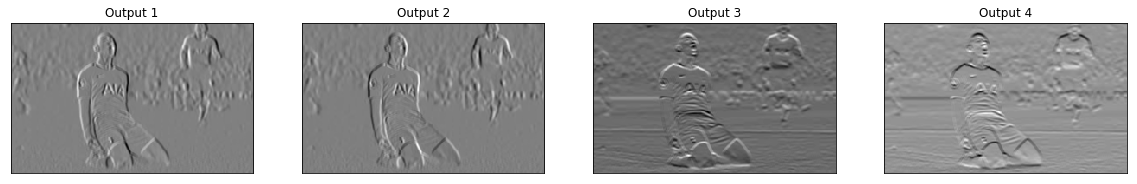

In [25]:
# visualize the output of a conv layer
viz_layer(conv_layer)

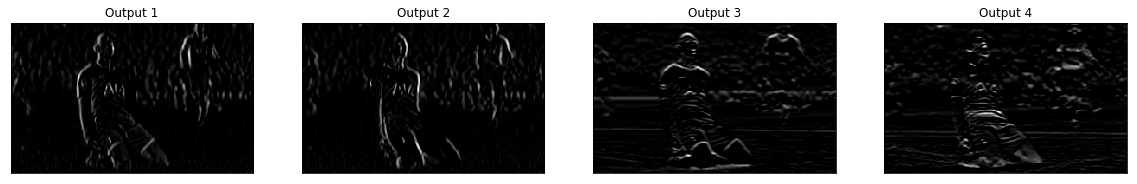

In [26]:
# visualize the output of an activated conv layer
viz_layer(activated_layer)